# Random Forest Classification Analysis

This notebook implements a Random Forest classifier to predict SARS-CoV-2 test results using the pediatric COVID-19 dataset.

In [11]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
# Load the dataset
df = pd.read_excel('COVID19 Pediatric Dataset.xlsx')
df.head()

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.02234,-0.517413,0.010677,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f7d619a94f97c45,5,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,d9e41465789c2b5,15,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data Preprocessing

In [13]:

# identify numeric columns
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Fill missing values only for numeric columns with their respective medians
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].median())

# For categorical columns (if any), we can fill with mode
categorical_columns = df.select_dtypes(include=['object']).columns
df[categorical_columns] = df[categorical_columns].fillna(df[categorical_columns].mode().iloc[0])

In [14]:
# Prepare feature matrix X and target variable y
X = df.drop(['SARS-Cov-2 exam result'], axis=1)
y = df['SARS-Cov-2 exam result']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Training and Evaluation

In [15]:
# Identify numeric and non-numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
non_numeric_cols = df.select_dtypes(exclude=['float64', 'int64']).columns

print("Non-numeric columns:")
print(non_numeric_cols)

# Remove the Patient ID column and any other non-predictive columns
columns_to_drop = ['Patient ID']  # Add any other non-predictive columns here
X = df.drop(columns=columns_to_drop)

# Keep only numeric columns for our features
X = X.select_dtypes(include=['float64', 'int64'])

# Our target variable
y = df['SARS-Cov-2 exam result']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now train the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Print model performance
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Create feature importance DataFrame
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

# Display top 10 most important features
print("\nTop 10 Most Important Features:")
print(feature_importance.head(10))

Non-numeric columns:
Index(['Patient ID', 'SARS-Cov-2 exam result', 'Respiratory Syncytial Virus',
       'Influenza A', 'Influenza B', 'Parainfluenza 1', 'CoronavirusNL63',
       'Rhinovirus/Enterovirus', 'Coronavirus HKU1', 'Parainfluenza 3',
       'Chlamydophila pneumoniae', 'Adenovirus', 'Parainfluenza 4',
       'Coronavirus229E', 'CoronavirusOC43', 'Inf A H1N1 2009',
       'Bordetella pertussis', 'Metapneumovirus', 'Parainfluenza 2',
       'Influenza B, rapid test', 'Influenza A, rapid test', 'Strepto A',
       'Urine - Esterase', 'Urine - Aspect', 'Urine - pH',
       'Urine - Hemoglobin', 'Urine - Bile pigments', 'Urine - Ketone Bodies',
       'Urine - Nitrite', 'Urine - Urobilinogen', 'Urine - Protein',
       'Urine - Leukocytes', 'Urine - Crystals', 'Urine - Hyaline cylinders',
       'Urine - Granular cylinders', 'Urine - Yeasts', 'Urine - Color'],
      dtype='object')

Classification Report:
              precision    recall  f1-score   support

    negative       0

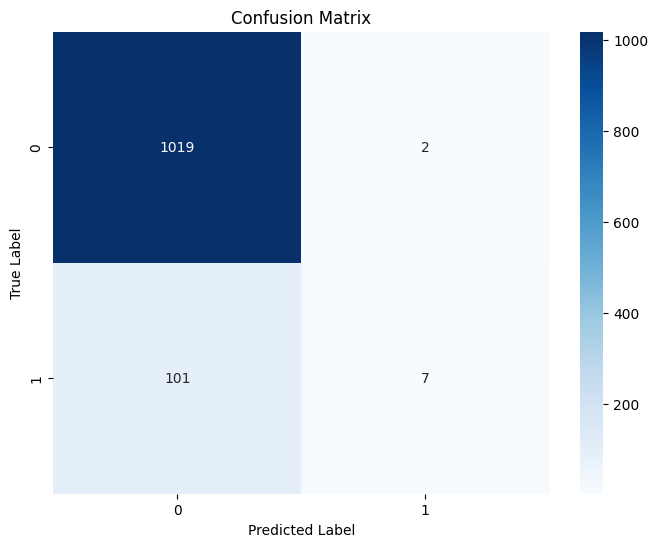

In [16]:
# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

## Feature Importance Analysis

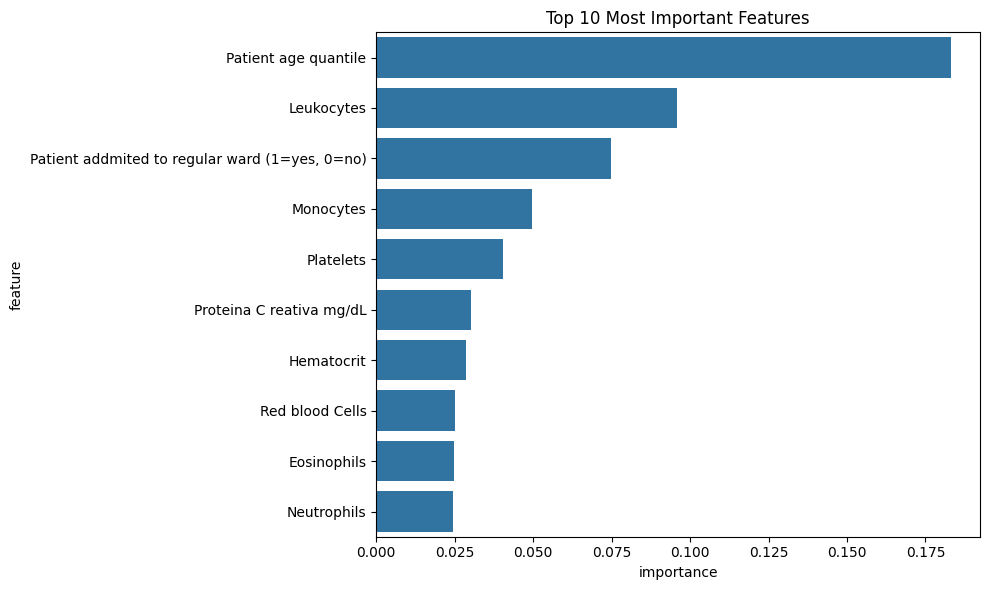

In [17]:
# Create feature importance DataFrame
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance.head(10))
plt.title('Top 10 Most Important Features')
plt.tight_layout()
plt.show()